<h1>A first look at a neural network</h1>

The problem we’re trying to solve here is to classify grayscale images of handwrit- ten digits (28 × 28 pixels) into their 10 categories (0 through 9). 

In [1]:
#INSTALL THE PACKAGES

!pip install keras

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 378kB 1.9MB/s ta 0:00:011
    100% |████████████████████████████████| 2.9MB 389kB/s eta 0:00:01
    100% |████████████████████████████████| 276kB 3.2MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 296kB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.9MB 82kB/s  eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 51kB 5.2MB/s eta 0:00:01
    100% |████████████████████████████████| 27.4MB 41kB/s eta 0:00:011
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /Users/sgyoung/Library/Caches/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Running setup.py bdist_wheel for keras-applications ... done
  Stored in directory: /Users/sgyoung/Library/Caches/pip/wheels

In [2]:
!pip install tensorflow

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 120.8MB 9.4kB/s eta 0:00:01
    100% |████████████████████████████████| 27.4MB 42kB/s  eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 61kB 7.5MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 3.8MB 304kB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 61kB 6.3MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 2.6MB 434kB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Using

  Using cached https://files.pythonhosted.org/packages/2c/47/e0d58be6f292684a4541d10b1da953542ff679f3ffc6096bee73634832b1/h5py-2.10.0-cp27-cp27m-macosx_10_6_intel.whl
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 163kB 5.4MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 133kB 6.4MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 6.2MB/s eta 0:00:01
    100% |████████████████████████████████| 163kB 5.2MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 7.3MB/s eta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 81kB 7.7MB/s eta 0:00:01

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9. The images and labels have a one-to-one correspondence.

In [4]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
len(train_labels)

60000

In [10]:
 train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

And here’s the test data:

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

First, we’ll feed the neural network the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels.



Let’s build the network.

<h2>The network architecture</h2>

In [14]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

Here, our network consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (sum- ming to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make the network ready for training, we need to pick three more things, as part
of the compilation step:

 A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direc- tion.

 An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.

 Metrics to monitor during training and testing—Here, we’ll only care about accu- racy (the fraction of the images that were correctly classified).



<h2>The compilation step</h2>

In [15]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our train- ing images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

<h2>Preparing the image data</h2>

In [16]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255


In [17]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<h2>Preparing the labels</h2>

We also need to categorically encode the labels

In [18]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

<h2>Train the Network</h2>

In Keras is done via a call to the net- work’s fit method—we fit the model to its training data.

Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data.

In [19]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2518 - accuracy: 0.9263
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.1040 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0699 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0502 - accuracy: 0.9846
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0379 - accuracy: 0.9884


<h2>Model Performance</h2>

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 36us/step


In [21]:
print('test_acc:', test_acc)

test_acc: 0.9782000184059143


The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine-learning models tend to perform worse on new data than on their training data.

<h2>Data representations for neural networks</h2>

<i>Definitions:</i>

tensors : multidimensional Numpy arrays. all current machine-learning systems use tensors as their basic data structure. a tensor is a container for data—almost always numerical data. So, it’s a container for numbers. You may be already familiar with matrices, which are 2D ten- sors: tensors are a generalization of matrices to an arbitrary number of dimensions

axis : aka dimension of the data

rank : The number of axes of a tensor

Types of Tensors:

<h2>Scalars (0D tensors)</h2>

A tensor that contains only one number is called a scalar.

 You can display the number of axes of a Numpy tensor via the ndim attribute; a sca- lar tensor has 0 axes (ndim == 0).
 
 Here’s a Numpy scalar:
 

In [23]:
import numpy as np
x = np.array(12)

In [24]:
x

array(12)

In [25]:
x.ndim

0

<h2>Vectors (1D tensors)</h2>

In [26]:
 x = np.array([12, 3, 6, 14])

In [27]:
x

array([12,  3,  6, 14])

In [28]:
x.ndim

1

<h2>Matrices (2D tensors)</h2>

In [29]:
x = np.array([[5, 78, 2, 34, 0], 
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])


In [30]:
x.ndim

2

<h2>3D tensors and higher-dimensional tensors</h2>

In [31]:
x = np.array([[[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                 [6, 79, 3, 35, 1],
                 [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                 [6, 79, 3, 35, 1],
                 [7, 80, 4, 36, 2]]])

In [32]:
x.ndim

3

<h2>Key attributes of tensors</h2>

1. Number of axes (rank)
2. Shape — This is a tuple of integers that describes how many dimensions the ten- sor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ()
3. Data type (usually called dtype in Python libraries)

In [33]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
print(train_images.ndim)

3


In [35]:
print(train_images.shape)

(60000, 28, 28)


In [36]:
print(train_images.dtype)


uint8



So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coeffi- cients between 0 and 255.

Let’s display the fourth digit in this 3D tensor, using the library Matplotlib (part of the standard scientific Python suite

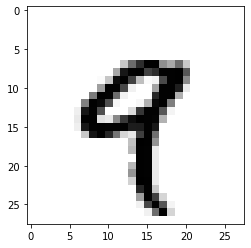

In [39]:
digit = train_images[4]
import matplotlib.pyplot as plt 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [40]:
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<h2>Manipulating tensors in Numpy</h2>

<h3>Slicing</h3>

we selected a specific digit alongside the first axis using the syntax train_images[i]. Selecting specific elements in a tensor is called tensor slicing.

Let’s look at the tensor-slicing operations you can do on Numpy arrays.

In [41]:
#The following example selects digits #10 to #100 (#100 isn’t included) 
#and puts them in an array of shape (90, 28, 28):

my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [42]:
#Note that : is equivalent to selecting the entire axis:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [43]:
# Also equivalent
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape


(90, 28, 28)

In [44]:
#For instance, in order to select 14 × 14 pixels 
#in the bottom-right corner of all images, you do this:

my_slice = train_images[:, 14:, 14:]

In [45]:
#It’s also possible to use negative indices

my_slice = train_images[:, 7:-7, 7:-7]

<h2>Batches</h2>

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis.

deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches.

In [46]:
batch = train_images[:128]

And here’s the next batch:

In [47]:
batch = train_images[128:256]

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. 

<h2>Real-world examples of data tensors</h2>

Usually one of these types:

1. Vector data—2D tensors of shape(samples,features)
2. Timeseries data or sequence data—3D tensors of shape (samples, timesteps, features)
3. Images—4D tensors of shape(samples,height,width,channels)or(samples, channels, height, width)
4. Video —5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)


<h2>Tensor Operations</h2>

All transformations learned by deep neural networks can be reduced to a handful of tensor operations applied to tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors, and so on.

<h3>Element-wise operations</h3>

The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations

<h3>Broadcasting</h3>

When possible, and if there’s no ambiguity, the smaller tensor will be broadcasted to match the shape of the larger tensor. Broadcasting consists of two steps:

1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.

2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.


<h3>Tensor dot</h3>

The most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors.

dot uses a different syntax in TensorFlow, but in both Numpy and Keras it’s done using the standard dot operator:

import numpy as np z = np.dot(x, y)

<h3>Tensor reshaping</h3>

Example:

train_images = train_images.reshape((60000, 28 * 28))

Reshaping a tensor means rearranging its rows and columns to match a target shape.

Naturally, the reshaped tensor has the same total number of coefficients as the initial tensor. Reshaping is best understood via simple examples:

In [27]:
x = np.array([[0., 1.], 
              [2., 3.],
              [4., 5.]])

In [28]:
print(x.shape)

(3, 2)


In [29]:
x.ndim

2

In [30]:
x = x.reshape((6, 1))

In [22]:
x

NameError: name 'x' is not defined

In [35]:
x = x.reshape((2,3))

In [36]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [37]:
x.ndim

2

In [39]:
x.shape

(2, 3)

A special case of reshaping that’s commonly encountered is transposition. Transposing a matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]:

In [40]:
x = np.zeros((300, 20))

In [41]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
x = np.transpose(x)

In [43]:
print(x.shape)

(20, 300)


In [44]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<h3>The engine of neural networks:
gradient-based optimization</h3>

1 Draw a batch of training samples x and corresponding targets y.

2 Run the network on x (a step called the forward pass) to obtain predictions y_pred.

3 Compute the loss of the network on the batch, a measure of the mismatch
between y_pred and y.

4 Update all weights of the network in a way that slightly reduces the loss on this
batch.